In [1]:
import pandas as pd
import numpy as np

Загрузим основной датасет

In [2]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Описание данных, исходя из первоначального источника:

    *id - идентификатор трека, созданного Spotify
    *acousticness - акустичность (от 0 до 1)
    *danceability - танцевальность (от 0 до 1)
    *energy - энергичность (от 0 до 1)
    *duration_ms - продолжительность, в мс (целое число, обычно от 200k до 300k)
    *instrumentalness - инструментальность (от 0 до 1)
    *valence - валентность (от 0 до 1)
    *popularity - популярность (от 0 до 100)
    *tempo - темп (Float обычно от 50 до 150)
    *liveness - живучесть (от 0 до 1)
    *loudness - громкость (обычно от -60 до 0)
    *speechiness - есть ли речь в треке (от 0 до 1)
    *year - год (в диапазоне от 1920 до 2021)
    
    *mode - тип музыки (0 = минор, 1 = мажор)
    *explicit - содержание откровенного текста (0 = не содержит , 1 = содержит)

    *key - ключ октавы (все клавиши на октаве закодированы как значения от 0 до 11, начиная с C как 0, C # как 1 и так далее...)
    *artists - исполнители (Список упомянутых исполнителей)
    *release_date - Дата выпуска в основном в формате гггг-мм-дд, однако точность даты может отличаться
    *name - Название песни


Посмотрим общую информацию по датафрейму

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

В датасете представленно 174389 записей и 19 столбцов (показатели/параметры свойств трека). Имеются как числовые, так и текстовые значения.

#### Работа над очисткой данных

Если посмотреть на датасет, то стоит более детально посмотреть на столбцы 'name', 'artists', 'release_date', 'year' и сравнить их с 'id'. Возможно будут или не уникальные или нулевые значения, или, как вариант, ошибки ввода. Остальные параметры по своему уникальны, отражают характеристики композиций, поэтому брать мы их не будем.

In [4]:
# посчитаем уникальные значения по выбранным столбцам с использованием цикла
columns = ['id', 'name', 'artists', 'release_date', 'year']
for col in columns:
  print(f'{col:<13}: {df[col].nunique()} unique values')

id           : 172230 unique values
name         : 137013 unique values
artists      : 36195 unique values
release_date : 11043 unique values
year         : 102 unique values


In [5]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

Видим, что уникальных значений 172230. Нулевых, незаполненных значений не найдено. 'release_date' содержит или значение с полным форматом даты или просто год. Попробуем найти дубликаты в датафрейме, избавиться от них, а после удалим вышеуказанные столбцы с сохранением остальных данных в новую переменную. Они не несут в себе качественную характеристику, а только описательную, для построения будующей модели этого не требуется. Также в первоначальном датафрейме есть треки с нулевым значения темпа, что не может быть возможным. Удалим такие аномалии.

В итоге для проведения общего анализа будем использовать переменную 'df', а для построения модели прогноза рейтинга 'df_ml'.

In [7]:
df = df[~df.duplicated()==1]
df.shape

(172230, 19)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().sum()

0

In [10]:
df_ml = df.drop(labels=['artists', 'id', 'name', 'release_date'], axis=1)
df_ml.shape

(172230, 15)

In [11]:
df_ml.duplicated().sum()

1476

In [12]:
df_ml = df_ml[~df_ml.duplicated()==1]
df_ml.shape

(170754, 15)

In [13]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000
mean,0.501914,0.536246,2.326718e+05,0.480989,0.067956,0.194968,5.204395,0.211396,-11.777780,0.703147,25.925913,0.105896,116.937762,0.525249,1976.582001
std,0.379394,0.175858,1.471768e+05,0.272032,0.251670,0.332974,3.517851,0.180661,5.690105,0.456873,21.866745,0.183053,30.290836,0.264392,26.708673
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.091300,0.414000,1.662000e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.935750,0.000000,1.000000,0.035200,93.834000,0.311000,1955.000000
50%,0.523000,0.547000,2.057175e+05,0.463000,0.000000,0.000498,5.000000,0.138000,-10.867000,1.000000,26.000000,0.045400,115.657000,0.537000,1977.000000
75%,0.896000,0.668000,2.656000e+05,0.708000,0.000000,0.238000,8.000000,0.270000,-7.532000,1.000000,42.000000,0.076000,134.991000,0.744000,1998.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Расчитаем популярность треков в совокупности по годам, а далее - по жанрам. Построим графики

Text(0, 0.5, 'Популярность')

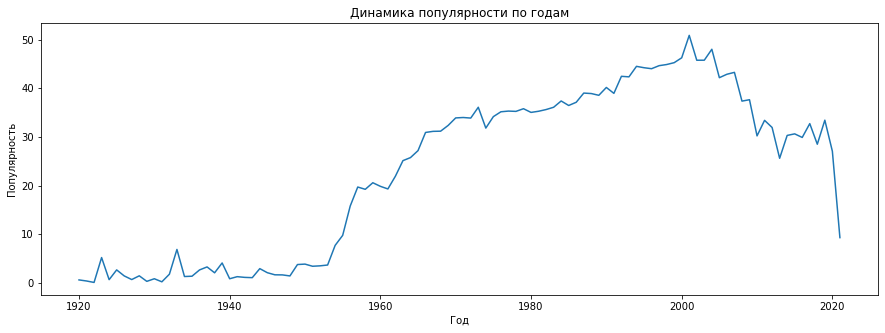

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 15,5
pop_year = df[['year', 'popularity']].groupby(['year']).mean()
pop_year
plt.plot(pop_year.index, pop_year.popularity)
plt.title('Динамика популярности по годам')
plt.xlabel('Год')
plt.ylabel('Популярность')

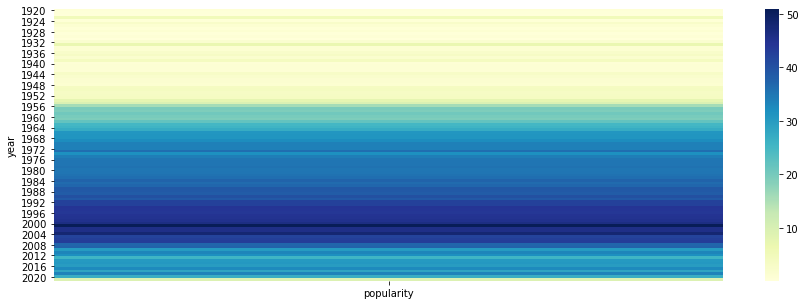

In [15]:
ax = sns.heatmap(pop_year, cmap='YlGnBu')

Особой популярностью пользуются треки 90-х и 00-х годов. Это можно объяснить тем, что предполагаемая аудитория, наиболее полно использующая платные сервисы прослушивания музыки находится диапазоне 20-35 лет. Следовательно для них характерно прослушивание треков, которые захватывают их молодой период жизни. Данный факт необходимо дополнительно проверять, чтобы подтвердить данную гипотезу, но в нашем случае у нас отсутствуют необходимые данные для ее подтверждения или опровержения. Хотелось бы отметить, что бизнес-заказчику необходимо смотреть на текущие тренды в музыке с ориентиром нашего предположения, возможно популярность согласно жанрам циклична с исторической точки зрения.

In [16]:
df_genre = pd.read_csv('data_by_genres.csv')
print(f'Количество жанров: ', df_genre.genres.count()) #выведем кол-во жанров
df_genre[['genres', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

Количество жанров:  3232


,genres,popularity
565,chinese electropop,79.000000
1768,korean mask singer,78.000000
3213,yaoi,77.000000
996,dutch rap pop,77.000000
2544,rochester mn indie,76.000000
945,dong-yo,76.000000
44,afroswing,75.333333
1616,j-rap,75.000000
1066,estonian pop,75.000000
1539,irish pop,74.625000


В ТОП-10 самых популярных жанров музыки из всего многообразия (3232) можно выделить поджанры направления поп-музыки, рэп-поп, а также электронного и r&b жанров. Направлений достаточно много и выделить четкую грань или разницу между ними довольно сложно. Также сильно выделяются жанры Азиатского направления. Данный факт можно объяснить с демографической точки зрения, т.к. население из стран Азии занимает бОльшую долю в населении планеты.

Попробуем посмотреть на наиболее часто встречающиеся жанры в композициях.

In [17]:
df_genre2 = pd.read_csv('data_w_genres.csv')
df_genre2.groupby('genres').count().sort_values('artists', ascending=False).head(10)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
genres,,,,,,,,,,,,,,,
[],13563,13563,13563,13563,13563,13563,13563,13563,13563,13563,13563,13563,13563,13563,13563
['movie tunes'],68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
['show tunes'],53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
['orchestral performance'],47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
['hollywood'],46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
['vocal trance'],46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
['classical soprano'],43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
['sleep'],41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
['macedonian folk'],41,41,41,41,41,41,41,41,41,41,41,41,41,41,41


Большая доля указана без типа жанра. Данный пункт мы не сможем заполнить, поэтому исключим его из нашего вывода.

Наиболее часто встречающиеся жанры - музыка к фильмам/шоу, оркестровая музыка, а также подвиды танцевальных жанров. Данные показатели не особо нас интересуют в дальнейшей работе, а лишь показывают данный факт.

Посмотрим подробнее на графике взаимосвязь популярности к используемому в композициях ключа. Для этого построим 2 диаграммы - распределение использования ключей в композициях (в процентном соотношении) и отношение каждого ключа к популярности.

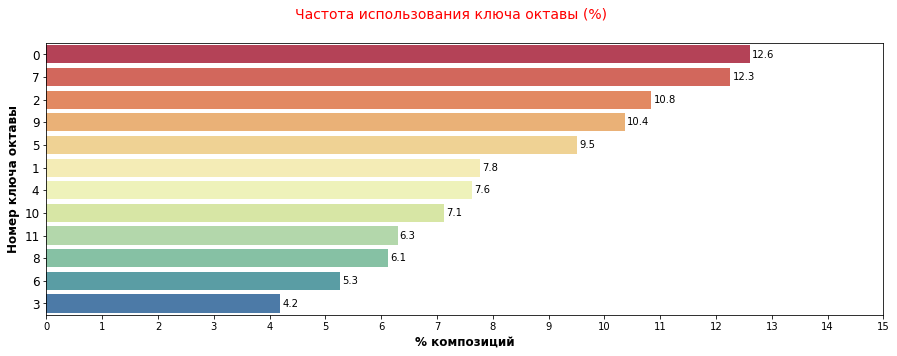

In [18]:
fig, ax = plt.subplots(figsize = (15, 5))
key_data = df['key'].value_counts(normalize=True, sort=True, ascending=True)*100
y_ticks = df['key'].value_counts().index
ax = sns.barplot(x = key_data.values, y= y_ticks, data = key_data, orient='h', palette='Spectral')
ax.set_xlabel('% композиций', fontsize=12, weight='bold')
ax.set_ylabel('Номер ключа октавы', fontsize=12, weight='bold')
ax.set_xlim(0.0,15.0, 0)
ax.set_xticks(ticks=range(0,16,1))
ax.set_yticklabels(labels=y_ticks, fontsize=12) 

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = 'left'
    
    label = f'{x_value:.1f}'

    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    

plt.suptitle('Частота использования ключа октавы (%)', fontsize=14, c='r')
plt.show()

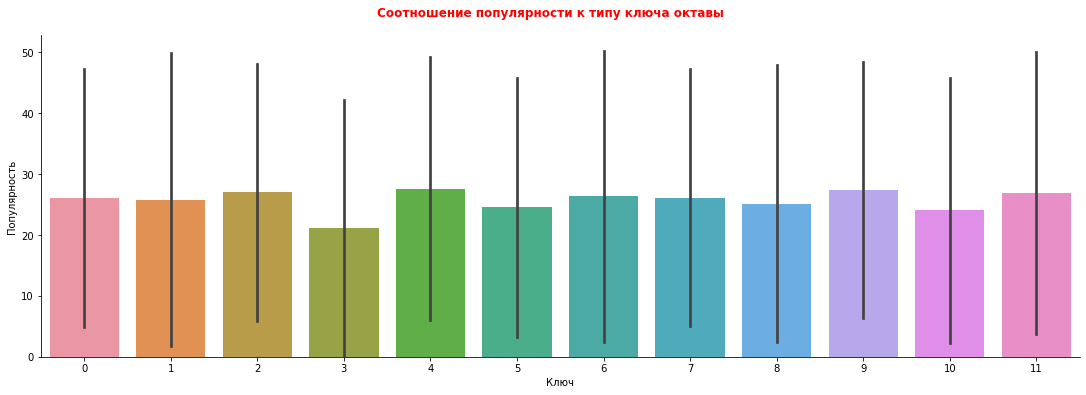

In [19]:
exp_data = sns.catplot(data=df, kind='bar',
                        x='key', y='popularity',
                        ci = 'sd',
                        height=5, aspect = 3)
exp_data.fig.suptitle('Соотношение популярности к типу ключа октавы', y=1.05, c='r', weight='bold')
exp_data.set_axis_labels('Ключ', 'Популярность')
plt.show()

Прямой взаимосвязи данный параметр не имеет, разница в используемых ключах по критерию популярности не имеет значения. Стоит только отметить о чуть сниженном уровне популярности у треков с использованием октавы под номером 3.

#### Корреляция показателей и проверка гипотез

Посмотрим на взаимосвязь параметров музыкальных композиций с нашей основной метрикой - популярностью, т.е. рассмотрим, насколько они коррелируют с ней. Наиболее коррелируемые показатели будут стремиться к значению "1" или "-1" (обратная взаимосвязь). Дополнительно выведем на экран тепловую карту для дополнительной визуальной составляющей.

In [20]:
#увеличим дефолтный размер графиков
rcParams['figure.figsize'] = 13,6

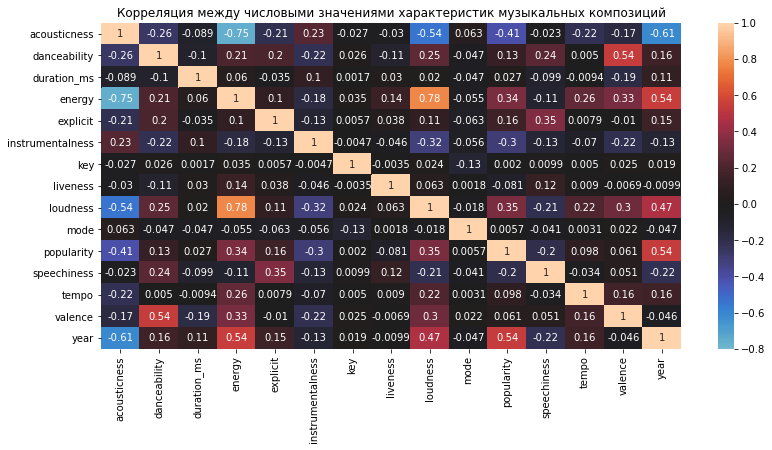

In [21]:
num_columns = df.columns[df.dtypes != 'object']
num_df = pd.DataFrame(data=df, columns=num_columns, index=df.index)
num_df.corr()
sns.heatmap(num_df.corr(), annot=True, vmin=-0.8, vmax=1, center= 0)
plt.title('Корреляция между числовыми значениями характеристик музыкальных композиций')
plt.show()

In [22]:
#Выведем коррелирующие показатели и отсортируем их по порядку
corr_sort = num_df.corr()
corr_sort.popularity.sort_values(ascending=False)

popularity          1.000000
year                0.540481
loudness            0.345262
energy              0.339694
explicit            0.155708
danceability        0.129071
tempo               0.098144
valence             0.061012
duration_ms         0.026716
mode                0.005745
key                 0.002034
liveness           -0.081315
speechiness        -0.197614
instrumentalness   -0.298125
acousticness       -0.408765
Name: popularity, dtype: float64

Наиболее коррелируемые с популярностью будут такие характеристики (показатели) как year, acousticness, loudness, energy, instrumentalness, speechiness, explicit, danceability.

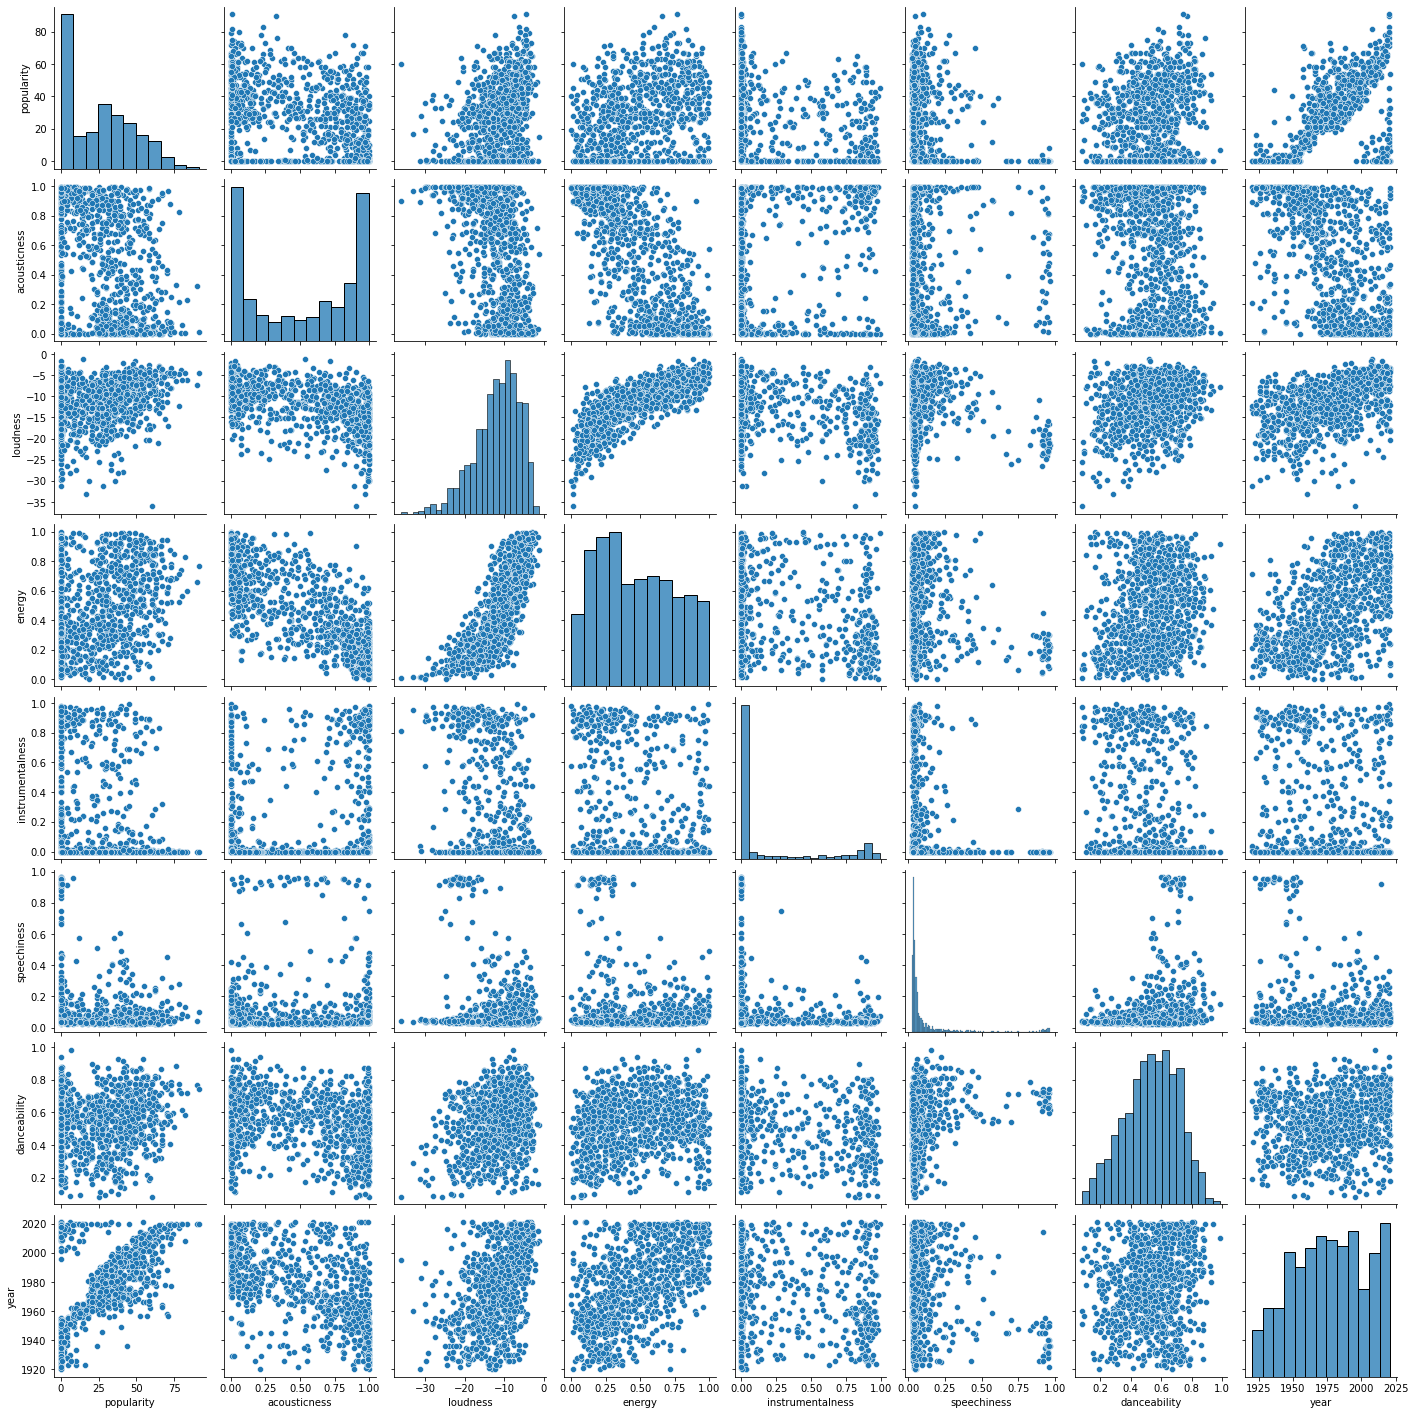

In [23]:
# sns.pairplot(corr_sort)
sns_plot = sns.pairplot(df.sample(1000), vars=['popularity', 'acousticness', 'loudness', 'energy', 
      'instrumentalness', 'speechiness', 'danceability', 'year'])
plt.show()

Интересно проверить тот факт, насколько отличается популярность треков с/без использования нецензурной лексики.

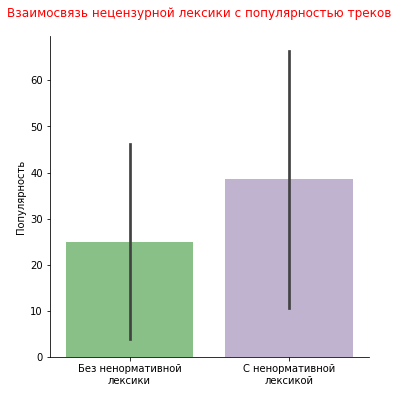

In [24]:
exp_data = sns.catplot(data=df, kind='bar',
                        x='explicit', y='popularity',
                        ci='sd', palette='Accent',
                        height=5)
exp_data.fig.suptitle('Взаимосвязь нецензурной лексики с популярностью треков', y=1.05, c='r')
exp_data.set_axis_labels('', 'Популярность')
exp_data.set_xticklabels(['Без ненормативной\nлексики', 'С ненормативной\nлексикой'])
plt.show()

##### Проверим гипотезу “Композиции в мажорном исполнении более популярны, чем в минорном”.
    
    Представим для этого нулевую и альтернативную гипотезу:
    
    *H0 - Популярность треков в мажоре и в миноре не имеют большого различия
    *H1 - Популярность треков в мажорном исполнении имеют существенные различия от минорного исполнения
Для начала построим диаграмму

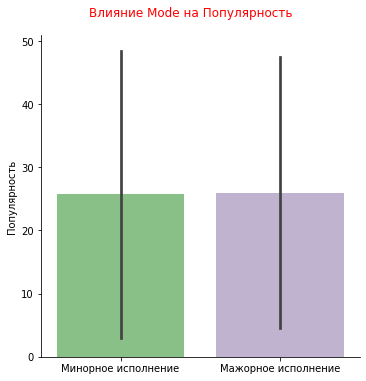

In [25]:
exp_data2 = sns.catplot(data=df, kind='bar',
                        x='mode', y='popularity',
                        ci='sd', palette='Accent',
                        height=5)
exp_data2.fig.suptitle('Влияние Mode на Популярность', y=1.05, c='r')
exp_data2.set_axis_labels('', 'Популярность')
exp_data2.set_xticklabels(['Минорное исполнение', 'Мажорное исполнение'])
plt.show()

В дополнение перепроверим статистически ли значимое у нас отклоение. Будем использовать t-тест Стьюдента.

In [26]:
# сделаем выборку
mode_df = df_ml[['mode', 'popularity']]

minor = mode_df[mode_df['mode']==0]
minor = minor[['popularity']]
major = mode_df[mode_df['mode']==1]
major = major[['popularity']]

import scipy.stats as stats

stat_m, p_m = stats.ttest_ind(minor, major) # применяем тест Стьюдента. 
print('Statistics=%.3f, p=%.3f' % (stat_m, p_m))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p_m > alpha:
    print('Популярность треков в мажоре и в миноре не имеют большого различия (не отвергаем H0)')
else:
    print('Популярность треков в мажорном исполнении имеют существенные различия от минорного исполнения (отвергаем H0)')

Statistics=-1.376, p=0.169
Популярность треков в мажоре и в миноре не имеют большого различия (не отвергаем H0)


In [27]:
# # Проверим распределение. Нулевая гипотеза: выборки имеют нормальное распределение

# x = np.concatenate((minor, major))
# k2, p3 = stats.normaltest(x)
# alpha = 1e-3

# print('p=%.3f' % (p3))
# # p3 = 3.27207e-11

# if p3 < alpha: 
#     print("Отклоняем нулевую гипотезу (распределение отличное от нормального)")
# else:
#     print("Не можем отклонить нулевую гипотезу (распределение нормальное)")

In [28]:
# ax = sns.distplot(minor)

In [29]:
# from scipy.stats import mannwhitneyu

# stat, p = mannwhitneyu(minor, major) # применяем тест МАнна-Уитни. 
# print('Statistics=%.3f, p=%.3f' % (stat, p))

# # Интерпретируем
# alpha = 0.05   # Уровень значимости
# if p > alpha:
#     print('Популярность треков в мажоре и в миноре не имеют большого различия (не отвергаем H0)')
# else:
#     print('Популярность треков в мажорном исполнении имеют существенные различия от минорного исполнения (отвергаем H0)')

Гипотеза “Композиции в мажорном исполнении более популярны, чем в минорном” у нас не подтвердилась, следовательно на популярность данный показатель оказывает статистически незначимое влияние, корреляция также имеет очень малое значение и составяет 0.005745.

##### Проверим гипотезу "Продолжительность наиболее популярных треков - 3-3,5 минуты"


In [30]:
df['duration_min'] = df['duration_ms']/60000 #конвертируем миллисекунды в минуты
df['duration_min'].describe()

count    172230.000000
mean          3.877864
std           2.452947
min           0.082283
25%           2.770000
50%           3.428625
75%           4.426667
max          88.971700
Name: duration_min, dtype: float64

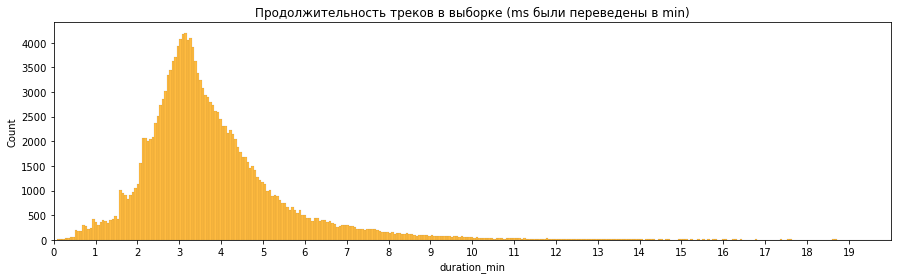

In [31]:
# посмотрим на общий размах в продолжительности треков (нужно будет перевести ms в min)
fig, ax_min = plt.subplots(figsize = (15, 4))
ax_min = sns.histplot(df['duration_min'], color='orange')
ax_min.set_title('Продолжительность треков в выборке (ms были переведены в min)')
ax_min.set_xticks(range(0,20,1))
ax_min.set_xlim(0,20)
plt.show()

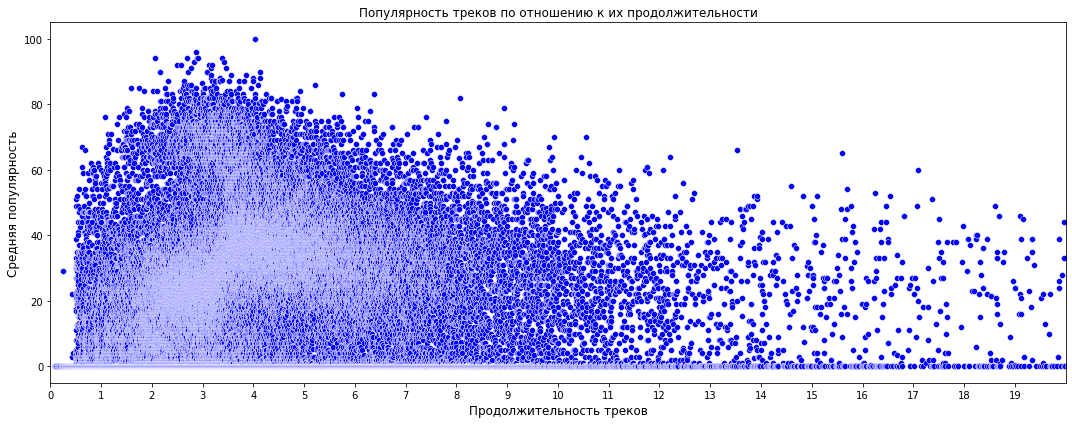

In [32]:
fig, ax = plt.subplots(figsize=(15, 6), sharey=True)

ax_data =  df.groupby('duration_min')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='duration_min', y='popularity', data=ax_data, color='blue')
ax.set_xticks(range(0,20,1))
ax.set_xlim(0,20)
ax.set_title('Популярность треков по отношению к их продолжительности')

ax.set_ylabel('Средняя популярность', fontsize=12)
ax.set_xlabel('Продолжительность треков', fontsize=12)
plt.tight_layout()
plt.show()

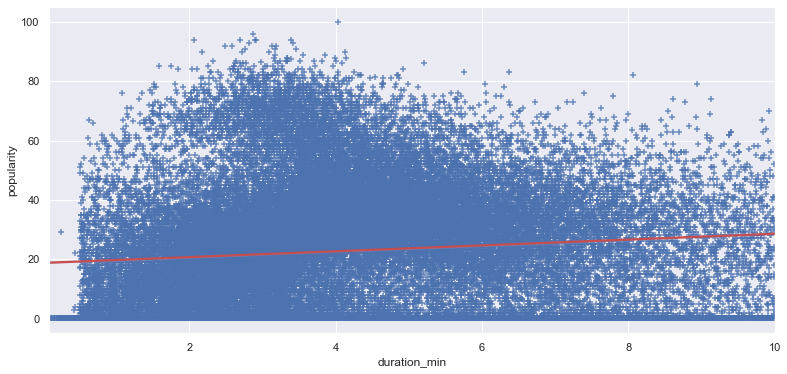

In [33]:
short_tracks3 = df.loc[df['duration_min']<=10]
ax_data3 = short_tracks3.groupby('duration_min')['popularity'].mean().to_frame().reset_index()

sns.set_theme(color_codes=True)
sns.regplot(x='duration_min', y='popularity', data=ax_data3, marker='+',line_kws={'color': 'r'}) 
plt.show() 

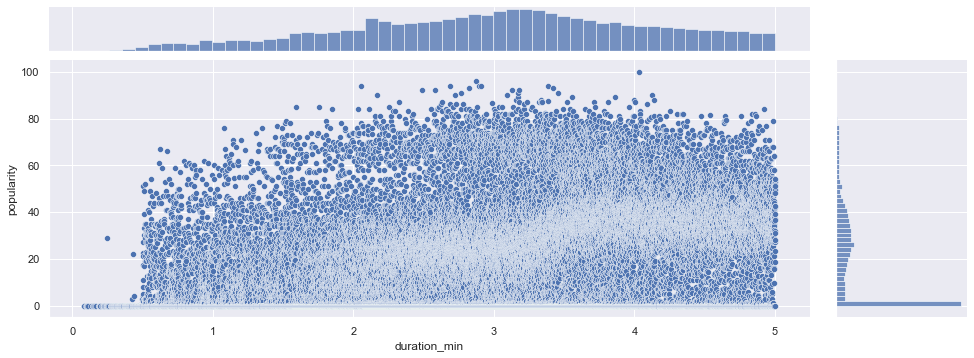

In [34]:
short_tracks = df.loc[df['duration_min']<=5]
ax_data2 = short_tracks.groupby('duration_min')['popularity'].mean().to_frame().reset_index()

g = sns.jointplot(x='duration_min', y='popularity', data=ax_data2, kind='scatter')
g.fig.set_size_inches(15,5)

Из распределения популярности в зависимости от продолжительности треков видим, что наибольшая плотность популярности находится в нашем проверяемом диапазоне - 3-3:30 минут. Гипотеза "Продолжительность наиболее популярных треков - 3-3,5 минуты" подтвердилась, но ее также можно и расширить, указав, что продолжительность наиболее популярных треков находится в диапазоне 2,5-3,5 минут.

##### Проверим гипотезу “Наиболее популярными треками являются те, которые имеют темп в 120 ударов в минуту”

Для начала уберем нулевые значения темпа из данных

In [35]:
data_t = df[df['tempo'] != 0]
data_t['tempo'].describe()

count    172110.000000
mean        117.019294
std          30.143550
min          30.946000
25%          93.881000
50%         115.689500
75%         134.994000
max         243.507000
Name: tempo, dtype: float64

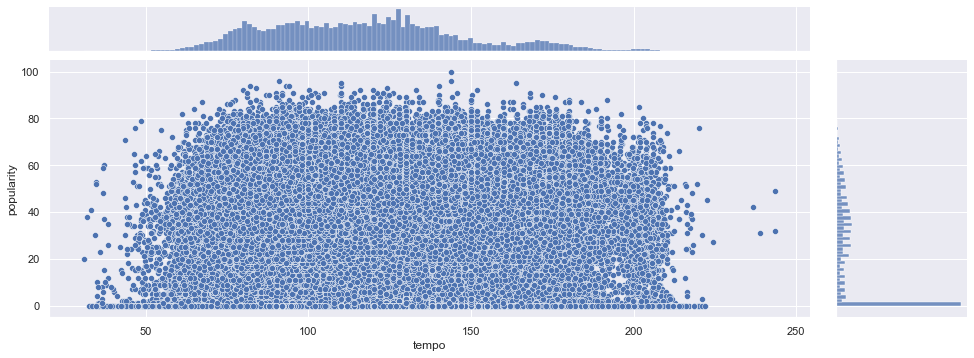

In [36]:
tempo_t = sns.jointplot(x='tempo', y='popularity', 
              data=data_t, kind='scatter')
tempo_t.fig.set_size_inches(15,5)

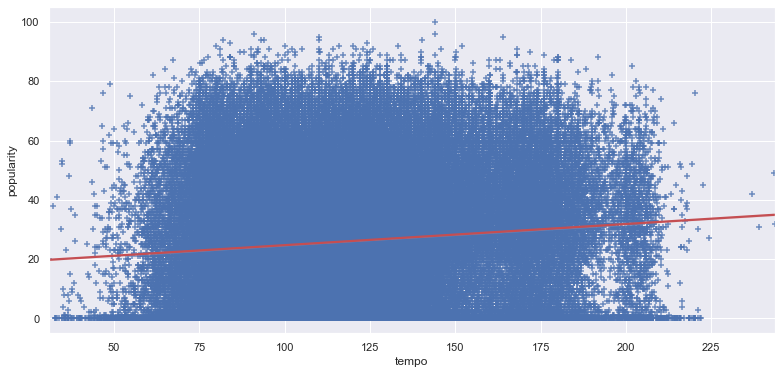

In [37]:
sns.set_theme(color_codes=True)
sns.regplot(x='tempo', y='popularity', data=data_t, marker='+',line_kws={'color': 'r'}) 

plt.show() 

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


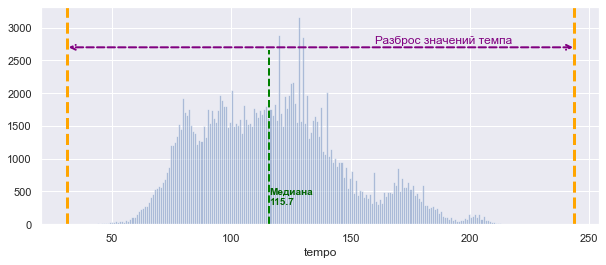

In [38]:
sns.set_theme(color_codes=False)
fig, ax = plt.subplots(figsize = (10, 4))
ax_tempo = sns.distplot(data_t['tempo'], bins=250, kde=False)
ax_tempo.text(s='Разброс значений темпа', x= 160, y=2750, fontdict={'size': 12, 'c': 'purple'})
ax_tempo.text(s='Медиана\n115.7', x= 116, y=300, fontdict={'size': 10, 'c': 'darkgreen', 'weight': 'bold'})
ax_tempo.axvline(x=115.7, ymin=0, ymax=0.8, color='green', linestyle='dashed', linewidth=2)
ax_tempo.axvline(x=30.95, ymin=0, ymax=1, color='orange', linestyle='dashed', linewidth=3)
ax_tempo.axvline(x=243.5, ymin=0, ymax=1, color='orange', linestyle='dashed', linewidth=3)
ax_tempo.annotate("", xy=(31, 2700), xytext=(244, 2700), arrowprops=dict(
                    arrowstyle="<->", color='purple', linestyle='dashed', linewidth=2))
plt.show()

Исходя из информации взаимосвязи темпа музыки с популярностью точно ответить на нашу гипотезу не получится. Да, среднее (117 BPM) и медианное (115,7 BPM) значения наиболее распространненых треков находятся рядом с нашей гипотезой, косвенно ее подтверждая. Однако, сама плотность популярности не сильно выделяется и находится примерно на одном уровне с 75-160 BPM. Если брать количеством, тогда да, основной темп треков с максимальной популярностью находится в значениях 116 ВРМ, что близко к нашему предположению.

Вывод: данная гипотеза косвенно подтвердилась, но однозначного положительного ответа на нее нет.


### Построение модели предсказания популярности трека

In [39]:
df_ml = df_ml.drop(labels=['duration_ms'], axis=1) 

In [40]:
df_ml.shape

(170754, 14)

In [41]:
final_df = pd.concat([df_ml,pd.get_dummies(df_ml['key'], prefix='key')],axis=1)
final_df.drop(columns=['key'], inplace=True)
final_df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.991000,0.598,0.224,0,0.000522,0.3790,-12.628,0,12,0.0936,...,0,0,0,1,0,0,0,0,0,0
1,0.643000,0.852,0.517,0,0.026400,0.0809,-7.261,0,7,0.0534,...,0,0,0,1,0,0,0,0,0,0
2,0.993000,0.647,0.186,0,0.000018,0.5190,-12.098,1,4,0.1740,...,0,0,0,0,0,0,0,0,0,0
3,0.000173,0.730,0.798,0,0.801000,0.1280,-7.311,1,17,0.0425,...,1,0,0,0,0,0,0,0,0,0
4,0.295000,0.704,0.707,1,0.000246,0.4020,-6.036,0,2,0.0768,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X = final_df.drop(columns=['popularity'])
y = final_df['popularity']
y.head()

0    12
1     7
2     4
3    17
4     2
Name: popularity, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
24608,0.9940,0.539,0.0483,0,0.07750,0.1240,-15.879,0,0.1910,65.414,...,1,0,0,0,0,0,0,0,0,0
67484,0.7800,0.195,0.2810,0,0.91500,0.1460,-16.853,0,0.0425,73.537,...,0,0,1,0,0,0,0,0,0,0
160461,0.9920,0.510,0.0942,0,0.00000,0.2940,-20.170,1,0.0416,137.255,...,0,0,0,0,0,1,0,0,0,0
107077,0.0162,0.823,0.5580,0,0.00435,0.0808,-8.238,1,0.1220,129.960,...,0,0,0,0,1,0,0,0,0,0
154466,0.2140,0.716,0.7880,0,0.22100,0.1420,-5.725,1,0.0451,109.992,...,0,0,0,0,0,1,0,0,0,0


In [44]:
# !pip install catboost
from catboost import CatBoostRegressor, Pool, cv
# будем передавать только те ветки, которые были преобразованны ohe + те, которые get_dummies не обрабатывал ('explicit', 'mode')
features = X_train[['explicit', 'mode', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 
                    'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']].columns
train_pool = Pool(X_train, y_train, features)

In [45]:
catboost_reg = CatBoostRegressor(iterations=1000, loss_function='RMSE', eval_metric='RMSE', random_seed=42)

catboost_reg.fit(train_pool,plot=True)
y_pred = catboost_reg.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.093651
0:	learn: 20.7313668	total: 218ms	remaining: 3m 37s
1:	learn: 19.8149489	total: 249ms	remaining: 2m 4s
2:	learn: 19.0256536	total: 280ms	remaining: 1m 33s
3:	learn: 18.3082915	total: 312ms	remaining: 1m 17s
4:	learn: 17.6962049	total: 344ms	remaining: 1m 8s
5:	learn: 17.1727679	total: 376ms	remaining: 1m 2s
6:	learn: 16.7001164	total: 410ms	remaining: 58.1s
7:	learn: 16.3137157	total: 445ms	remaining: 55.1s
8:	learn: 15.9742171	total: 475ms	remaining: 52.3s
9:	learn: 15.6864426	total: 506ms	remaining: 50.1s
10:	learn: 15.4257684	total: 538ms	remaining: 48.4s
11:	learn: 15.2175883	total: 569ms	remaining: 46.8s
12:	learn: 15.0229189	total: 596ms	remaining: 45.3s
13:	learn: 14.8512627	total: 632ms	remaining: 44.5s
14:	learn: 14.7115009	total: 663ms	remaining: 43.5s
15:	learn: 14.5895009	total: 700ms	remaining: 43.1s
16:	learn: 14.4772995	total: 737ms	remaining: 42.6s
17:	learn: 14.3778375	total: 775ms	remaining: 42.3s
18:	learn: 14.2916648	total: 809ms	remain

163:	learn: 12.8087285	total: 5.42s	remaining: 27.6s
164:	learn: 12.8053910	total: 5.45s	remaining: 27.6s
165:	learn: 12.8018374	total: 5.47s	remaining: 27.5s
166:	learn: 12.7991301	total: 5.5s	remaining: 27.5s
167:	learn: 12.7962219	total: 5.53s	remaining: 27.4s
168:	learn: 12.7933082	total: 5.57s	remaining: 27.4s
169:	learn: 12.7916843	total: 5.59s	remaining: 27.3s
170:	learn: 12.7874499	total: 5.62s	remaining: 27.3s
171:	learn: 12.7841364	total: 5.66s	remaining: 27.2s
172:	learn: 12.7794724	total: 5.7s	remaining: 27.2s
173:	learn: 12.7765931	total: 5.73s	remaining: 27.2s
174:	learn: 12.7736943	total: 5.76s	remaining: 27.2s
175:	learn: 12.7697098	total: 5.79s	remaining: 27.1s
176:	learn: 12.7657771	total: 5.82s	remaining: 27.1s
177:	learn: 12.7635161	total: 5.85s	remaining: 27s
178:	learn: 12.7620297	total: 5.88s	remaining: 27s
179:	learn: 12.7591483	total: 5.91s	remaining: 26.9s
180:	learn: 12.7558828	total: 5.94s	remaining: 26.9s
181:	learn: 12.7527127	total: 5.97s	remaining: 26.8s

319:	learn: 12.4407455	total: 10.6s	remaining: 22.5s
320:	learn: 12.4393308	total: 10.6s	remaining: 22.4s
321:	learn: 12.4374385	total: 10.6s	remaining: 22.4s
322:	learn: 12.4360852	total: 10.7s	remaining: 22.4s
323:	learn: 12.4351331	total: 10.7s	remaining: 22.3s
324:	learn: 12.4332650	total: 10.7s	remaining: 22.3s
325:	learn: 12.4322150	total: 10.8s	remaining: 22.3s
326:	learn: 12.4295759	total: 10.8s	remaining: 22.3s
327:	learn: 12.4280466	total: 10.9s	remaining: 22.3s
328:	learn: 12.4263050	total: 10.9s	remaining: 22.2s
329:	learn: 12.4247894	total: 10.9s	remaining: 22.2s
330:	learn: 12.4234842	total: 11s	remaining: 22.2s
331:	learn: 12.4222688	total: 11s	remaining: 22.2s
332:	learn: 12.4202691	total: 11.1s	remaining: 22.1s
333:	learn: 12.4185244	total: 11.1s	remaining: 22.1s
334:	learn: 12.4171886	total: 11.1s	remaining: 22.1s
335:	learn: 12.4150478	total: 11.2s	remaining: 22s
336:	learn: 12.4135577	total: 11.2s	remaining: 22s
337:	learn: 12.4125135	total: 11.2s	remaining: 22s
338

480:	learn: 12.2058917	total: 16.2s	remaining: 17.5s
481:	learn: 12.2039475	total: 16.2s	remaining: 17.4s
482:	learn: 12.2028754	total: 16.2s	remaining: 17.4s
483:	learn: 12.2020232	total: 16.3s	remaining: 17.4s
484:	learn: 12.2012070	total: 16.4s	remaining: 17.4s
485:	learn: 12.2000235	total: 16.5s	remaining: 17.5s
486:	learn: 12.1989341	total: 16.6s	remaining: 17.5s
487:	learn: 12.1976808	total: 16.7s	remaining: 17.5s
488:	learn: 12.1965260	total: 16.8s	remaining: 17.5s
489:	learn: 12.1955518	total: 16.8s	remaining: 17.5s
490:	learn: 12.1946469	total: 16.9s	remaining: 17.5s
491:	learn: 12.1938798	total: 16.9s	remaining: 17.5s
492:	learn: 12.1929627	total: 17.3s	remaining: 17.8s
493:	learn: 12.1921116	total: 17.3s	remaining: 17.7s
494:	learn: 12.1904073	total: 17.3s	remaining: 17.7s
495:	learn: 12.1892199	total: 17.4s	remaining: 17.7s
496:	learn: 12.1880490	total: 17.4s	remaining: 17.6s
497:	learn: 12.1870721	total: 17.4s	remaining: 17.6s
498:	learn: 12.1864193	total: 17.5s	remaining:

638:	learn: 12.0261303	total: 22.5s	remaining: 12.7s
639:	learn: 12.0252998	total: 22.5s	remaining: 12.7s
640:	learn: 12.0243552	total: 22.5s	remaining: 12.6s
641:	learn: 12.0235833	total: 22.6s	remaining: 12.6s
642:	learn: 12.0223747	total: 22.6s	remaining: 12.6s
643:	learn: 12.0214542	total: 22.6s	remaining: 12.5s
644:	learn: 12.0203549	total: 22.7s	remaining: 12.5s
645:	learn: 12.0198330	total: 22.7s	remaining: 12.4s
646:	learn: 12.0182859	total: 22.7s	remaining: 12.4s
647:	learn: 12.0174293	total: 22.8s	remaining: 12.4s
648:	learn: 12.0167802	total: 22.8s	remaining: 12.3s
649:	learn: 12.0159433	total: 22.8s	remaining: 12.3s
650:	learn: 12.0141771	total: 22.9s	remaining: 12.3s
651:	learn: 12.0133973	total: 22.9s	remaining: 12.2s
652:	learn: 12.0123531	total: 22.9s	remaining: 12.2s
653:	learn: 12.0113651	total: 23s	remaining: 12.2s
654:	learn: 12.0102702	total: 23s	remaining: 12.1s
655:	learn: 12.0093006	total: 23s	remaining: 12.1s
656:	learn: 12.0087310	total: 23.1s	remaining: 12s
6

794:	learn: 11.8787896	total: 28s	remaining: 7.22s
795:	learn: 11.8776414	total: 28s	remaining: 7.18s
796:	learn: 11.8764770	total: 28.1s	remaining: 7.15s
797:	learn: 11.8751918	total: 28.1s	remaining: 7.11s
798:	learn: 11.8742008	total: 28.1s	remaining: 7.07s
799:	learn: 11.8736467	total: 28.1s	remaining: 7.04s
800:	learn: 11.8728665	total: 28.2s	remaining: 7s
801:	learn: 11.8719252	total: 28.2s	remaining: 6.96s
802:	learn: 11.8707609	total: 28.2s	remaining: 6.93s
803:	learn: 11.8696320	total: 28.3s	remaining: 6.89s
804:	learn: 11.8685006	total: 28.3s	remaining: 6.86s
805:	learn: 11.8676201	total: 28.3s	remaining: 6.82s
806:	learn: 11.8669127	total: 28.4s	remaining: 6.78s
807:	learn: 11.8659373	total: 28.4s	remaining: 6.75s
808:	learn: 11.8649848	total: 28.4s	remaining: 6.71s
809:	learn: 11.8637855	total: 28.5s	remaining: 6.68s
810:	learn: 11.8631449	total: 28.5s	remaining: 6.64s
811:	learn: 11.8625278	total: 28.5s	remaining: 6.6s
812:	learn: 11.8615228	total: 28.6s	remaining: 6.57s
8

955:	learn: 11.7365252	total: 33.5s	remaining: 1.54s
956:	learn: 11.7356763	total: 33.5s	remaining: 1.51s
957:	learn: 11.7348726	total: 33.6s	remaining: 1.47s
958:	learn: 11.7342154	total: 33.6s	remaining: 1.44s
959:	learn: 11.7326217	total: 33.6s	remaining: 1.4s
960:	learn: 11.7318547	total: 33.6s	remaining: 1.36s
961:	learn: 11.7313874	total: 33.7s	remaining: 1.33s
962:	learn: 11.7308540	total: 33.7s	remaining: 1.29s
963:	learn: 11.7300478	total: 33.7s	remaining: 1.26s
964:	learn: 11.7291855	total: 33.8s	remaining: 1.22s
965:	learn: 11.7287617	total: 33.8s	remaining: 1.19s
966:	learn: 11.7279056	total: 33.8s	remaining: 1.15s
967:	learn: 11.7271547	total: 33.8s	remaining: 1.12s
968:	learn: 11.7263017	total: 33.9s	remaining: 1.08s
969:	learn: 11.7250508	total: 33.9s	remaining: 1.05s
970:	learn: 11.7242946	total: 33.9s	remaining: 1.01s
971:	learn: 11.7236122	total: 34s	remaining: 979ms
972:	learn: 11.7225246	total: 34s	remaining: 944ms
973:	learn: 11.7214590	total: 34s	remaining: 909ms


In [46]:
from sklearn.metrics import mean_squared_error
import math

def rmse(y_test,y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

# print(rmse(y_test,y_pred))
print(f'Среднеквадратическая ошибка: ', rmse(y_train,catboost_reg.predict(X_train)))

Среднеквадратическая ошибка:  11.70163730604438
